功能：

- 1.找到合适的拟合生存曲线；
- 2.计算维修时间间隔，确定预防性更换时间；
- 3.库存管理（确定最优采购数量及最佳采购时间）

### plots the survival function

In [1]:
from reliability.Nonparametric import KaplanMeier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

path = os.path.dirname(os.getcwd())+'\\data_csv\\541674-4.csv'
data1 = pd.read_csv(path, encoding = "GBK")
data1["部件本次装机使用小时"] = data1["部件本次装机使用小时"].str.split(':').str[0].astype(int)
data1 = data1[data1["部件本次装机使用小时"]>0]
data1["IsPlanned"] = data1["非计划"]=="X"
data_y = data1[["IsPlanned", "部件本次装机使用小时"]]

data1["IsPlaneNew"] = data1["部件装上飞行小时数"]=="00:00"
data1["IsPartNew"] = data1["部件装上使用小时数"]=="00:00"
def CheckNew(p1,p2):
    if p1 and p2:
        return "PlaneNew-PartNew"
    elif p1 and not p2:
        return "PlaneNew-PartOld"
    elif not p1 and p2:
        return "PlaneOld-PartNew"
    elif not p1 and not p2:
        return "PlaneOld-PartOld"

data1["PlanePartType"] = [CheckNew(row["IsPlaneNew"], row["IsPartNew"]) for idx, row in data1.iterrows()]

data1["安装日期"] = pd.to_datetime(data1["安装日期"])
data1["安装年度"] = data1["安装日期"].dt.year

di = {"霍尼韦尔": "HONEYWELL"}
data1.replace({"最近送修公司": di}, inplace=True)
data1["最近送修公司"].fillna("Unknown", inplace=True)

data1["FH TSN"].fillna("00:00", inplace=True)
data1["部件装上飞行小时数"] = data1["部件装上飞行小时数"].str.split(':').str[0].astype(int)
data1["部件装上使用小时数"] = data1["部件装上使用小时数"].str.split(':').str[0].astype(int)

data1["部件装上飞行小时数-Range"] = pd.cut(data1['部件装上飞行小时数'], 8)
data1["部件装上使用小时数-Range"] = pd.cut(data1['部件装上使用小时数'], 8)
data1["CY TSN-Range"] = pd.cut(data1['CY TSN'], 8)
data1["FH TSN-Range"] = pd.cut(data1['FH TSN'], 8)

data_x = data1[["机型","安装年度","部件装上飞行小时数-Range","部件装上使用小时数-Range","FH TSN-Range", "最近送修公司",
                "PlanePartType"]]

# 含有故障零件和未损坏零件
display(data_x)
# true已坏     false未坏
display(data_y)

,机型,安装年度,部件装上飞行小时数-Range,部件装上使用小时数-Range,FH TSN-Range,最近送修公司,PlanePartType
0,73C,2000,"(-61.651, 7706.375]","(-94.78, 11847.5]","(25585.132, 38377.699]",Unknown,PlaneNew-PartNew
1,73C,2009,"(38531.875, 46238.25]","(35542.5, 47390.0]","(12792.566, 25585.132]",Unknown,PlaneOld-PartOld
2,73C,2002,"(-61.651, 7706.375]","(-94.78, 11847.5]","(38377.699, 51170.265]",Unknown,PlaneNew-PartNew
3,73C,1995,"(-61.651, 7706.375]","(-94.78, 11847.5]","(51170.265, 63962.831]",Unknown,PlaneNew-PartNew
4,73C,2005,"(38531.875, 46238.25]","(35542.5, 47390.0]","(12792.566, 25585.132]",GAMECO,PlaneOld-PartOld
6,73C,2008,"(38531.875, 46238.25]","(23695.0, 35542.5]","(12792.566, 25585.132]",Unknown,PlaneOld-PartOld
7,73C,2008,"(30825.5, 38531.875]","(35542.5, 47390.0]","(51170.265, 63962.831]",武汉航达,PlaneOld-PartOld
8,73C,2003,"(-61.651, 7706.375]","(-94.78, 11847.5]","(51170.265, 63962.831]",Unknown,PlaneNew-PartNew
9,73C,1997,"(-61.651, 7706.375]","(-94.78, 11847.5]","(12792.566, 25585.132]",Unknown,PlaneNew-PartNew
10,73C,1996,"(-61.651, 7706.375]","(-94.78, 11847.5]","(25585.132, 38377.699]",Unknown,PlaneNew-PartNew


,IsPlanned,部件本次装机使用小时
0,True,45588
1,True,901
2,True,45119
3,True,44695
4,True,151
6,True,981
7,False,1591
8,True,40114
9,True,20609
10,True,37429


In [6]:
# 所有故障数据(不止第一次坏掉的)
failures = data_y.loc[data_y["IsPlanned"] == True, ]
failures = np.array(failures["部件本次装机使用小时"])
print(failures.shape)
failures

(800,)


array([45588,   901, 45119, 44695,   151,   981, 40114, 20609, 37429,
       40649,  3431, 34627,  1164, 39734,   160,  3960, 32364, 45191,
       26345, 40390, 20236, 10126, 13960, 20937,    36, 15725,  6871,
       20611, 13338, 13168,  2885,  1487,  6917, 18835, 14414,  3951,
        9691,  9268,  9711,  3977, 10474,  1986,  1406, 11780, 14651,
        3813, 13341, 11447,  2760, 12343, 15651, 16440,   854, 15876,
        9878,  4178,   127,   411, 13509,  7973, 14985,  8003, 15477,
         865, 17409,   688, 10611,  8214,   502,  1020, 20007, 22042,
        2065,  4944, 14019, 21179, 19483, 11790, 13819, 23032,  4828,
       14992, 14258,  7494, 23495, 19965,  1045, 21225, 17379,  2542,
        6590,  2789,    31,  6403,  5724,  5045, 24868,   523,  4944,
       28472,    11, 19424,    53,    44, 17774,  1219, 14065, 18385,
        3670, 18697,  6240,  5609,  4107,  5018, 16283,  8419, 10302,
        1131,  3363,  5857,  7669,  6812,  2018,  8749, 10944,  3584,
         672,  2453,

In [8]:
# 所有右删失数据(还没坏的数据,不止第一次使用的)
censored = data_y.loc[data_y["IsPlanned"] == False]
# censored = censored[["部件本次装机使用小时"]].to_records(index=False)
censored = np.array(censored["部件本次装机使用小时"])
print(censored.shape)
censored

(83,)


array([ 1591, 29257,   288, 15046,  3682,  8729,  8041, 12545, 10960,
         798,  6995, 11257,  2740,  2097,    38,  2709,  2336,   664,
        7312,   240,  9557,  6446,  1792,   267,   865,  6491,   296,
        1147,   389,  3292,  8555,  1103,    46,  9568,  2052,    32,
         872,  9956,  5320,  3909,  2416,  8568,   279,   444,  5665,
        1021,  8299,  4089,  9623,  1465,    36,  3918,   955,    39,
         321, 15781,    61,  2619,   130, 10501,  7549,  5192,  5128,
          89,  4072,  7989,  6640,    88,   909,  7220,  6354, 16227,
          80,   272,  4397,  4976,  1556,    61,    30, 17849, 26988,
       25346, 48390])

                  Alpha      Beta  Gamma       Mu    Sigma       Lambda     AICc      BIC
Distribution                                                                             
Gamma_3P          11444   0.77104  4.991                                   16101  16110.4
Gamma_2P          11123  0.793743                                        16110.6    16120
Weibull_3P      8369.07  0.882172  4.991                                 16120.4  16129.8
Weibull_2P      8427.89  0.895811                                        16125.9  16135.3
Exponential_2P                         5                     0.00011333  16138.3    16143
Exponential_1P                                              0.000113266  16139.2  16143.9
Lognormal_2P                              8.33729   1.6839               16447.8  16457.1
Normal_2P                                 8828.81  8702.71               16788.5  16797.9


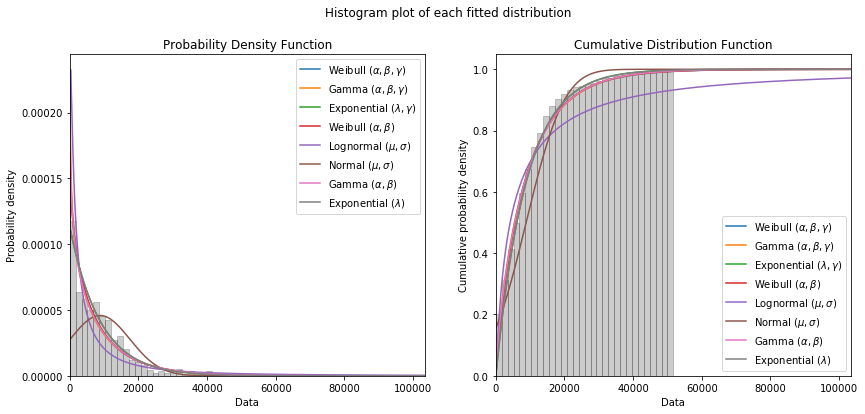

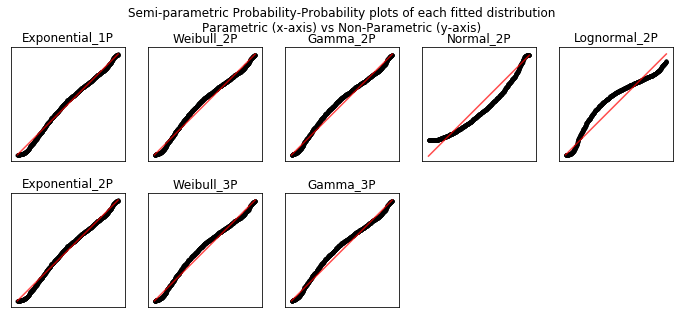

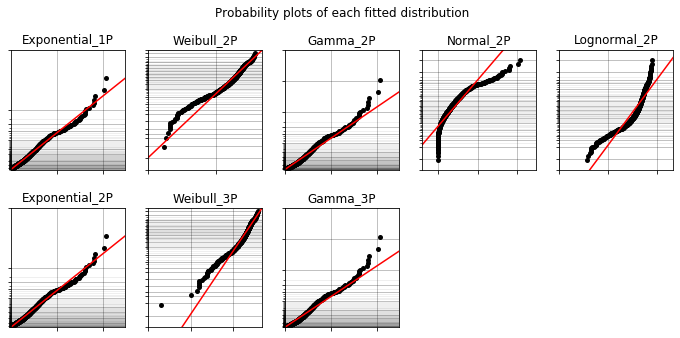

The best fitting distribution was Gamma_3P which had parameters [1.14440453e+04 7.71040183e-01 4.99100000e+00]


In [9]:
# 无删失数据的分布函数
from reliability.Fitters import Fit_Everything
results=Fit_Everything(failures=failures)
print('The best fitting distribution was',results.best_distribution_name,'which had parameters',results.best_distribution.parameters)


                  Alpha      Beta  Gamma       Mu    Sigma       Lambda     AICc      BIC
Distribution                                                                             
Gamma_3P        11585.5  0.803847  4.991                                 16209.2  16218.8
Gamma_2P          11765  0.807848                                        16217.8  16227.3
Weibull_3P      9047.33  0.889956  4.991                                 16226.5  16236.1
Weibull_2P      9099.45  0.903461                                        16231.7  16241.3
Exponential_2P                         5                    0.000106214    16242  16246.8
Exponential_1P                                              0.000106152  16242.9  16247.7
Lognormal_2P                              8.45099   1.7001               16553.1  16562.6
Normal_2P                                 9400.71  8849.77                 16903  16912.6


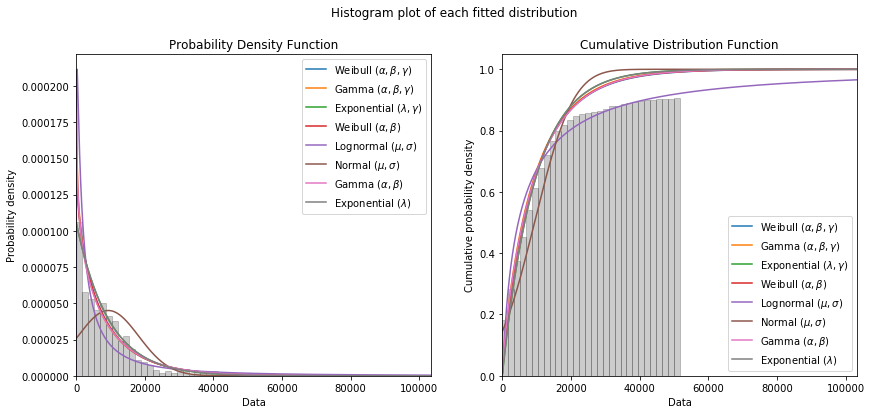

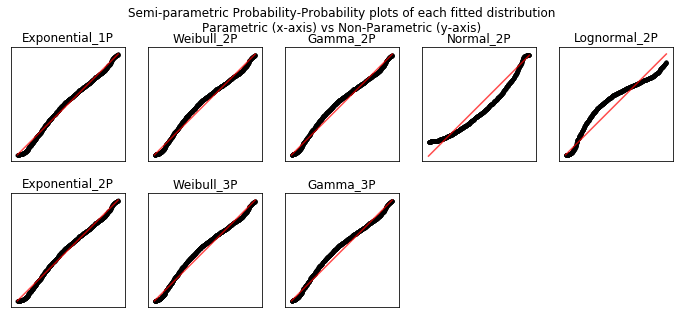

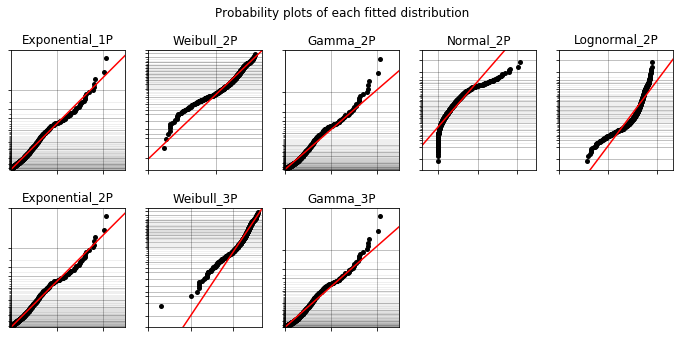

The best fitting distribution was Gamma_3P which had parameters [1.15855127e+04 8.03846613e-01 4.99100000e+00]


In [10]:
# 含右删失数据的分布函数
results=Fit_Everything(failures=failures, right_censored=censored)
print('The best fitting distribution was',results.best_distribution_name,'which had parameters',results.best_distribution.parameters)


               Censoring code (censored=0)  Items remaining  Kaplan-Meier Estimate  Lower CI bound  Upper CI bound
Failure times                                                                                                     
5.0                                    1.0              800                0.99875        0.996302        1.000000
6.0                                    1.0              799                0.99750        0.994040        1.000000
8.0                                    1.0              798                0.99625        0.992015        1.000000
9.0                                    1.0              797                0.99500        0.990112        0.999888
9.0                                    1.0              796                0.99375        0.988289        0.999211
9.0                                    1.0              795                0.99250        0.986521        0.998479
9.0                                    1.0              794                0.991

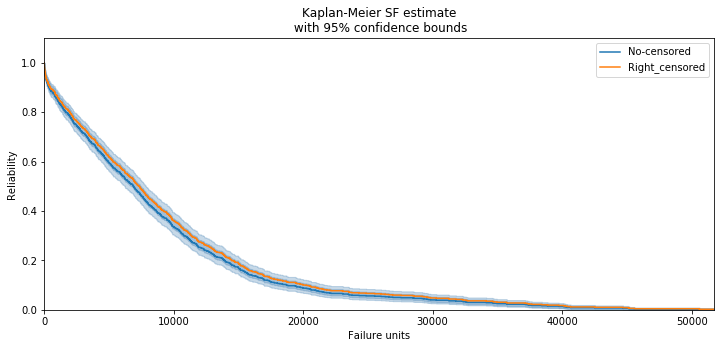

In [11]:
from reliability.Nonparametric import KaplanMeier
plt.figure(figsize=(12,5))

# 无删失数据的km曲线
KaplanMeier(failures=failures, label='No-censored')

# 有删失数据的km曲线
KaplanMeier(failures=failures, right_censored=censored, label='Right_censored')

plt.legend()
plt.show()

               Censoring code (censored=0)  Items remaining  Kaplan-Meier Estimate  Lower CI bound  Upper CI bound
Failure times                                                                                                     
5.0                                    1.0              800                0.99875        0.996302        1.000000
6.0                                    1.0              799                0.99750        0.994040        1.000000
8.0                                    1.0              798                0.99625        0.992015        1.000000
9.0                                    1.0              797                0.99500        0.990112        0.999888
9.0                                    1.0              796                0.99375        0.988289        0.999211
9.0                                    1.0              795                0.99250        0.986521        0.998479
9.0                                    1.0              794                0.991

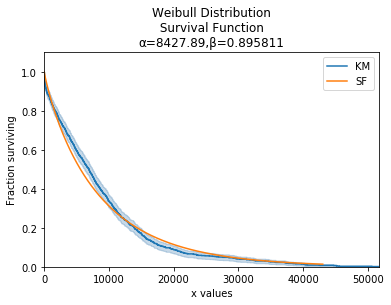

In [13]:
# 无删失数据的拟合生存曲线
from reliability.Distributions import Weibull_Distribution
dist = Weibull_Distribution(alpha=8427.89, beta=0.895811)

KaplanMeier(failures=failures, label='KM')

dist.SF(label='SF') #plots the survival function
plt.legend()
# plt.savefig('image2.jpg')
plt.show()

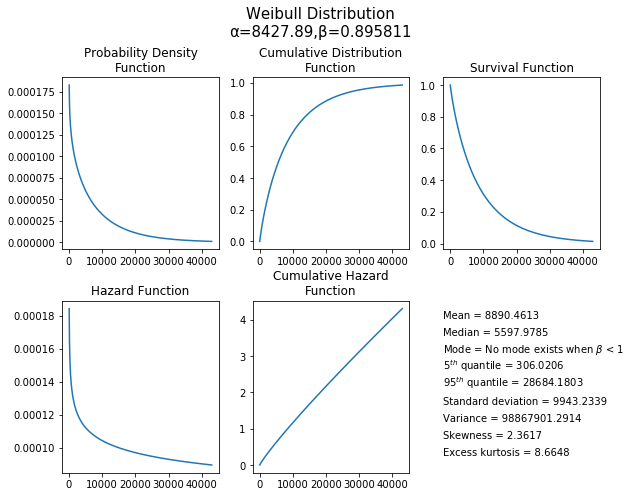

In [14]:
dist.plot()

               Censoring code (censored=0)  Items remaining  Kaplan-Meier Estimate  Lower CI bound  Upper CI bound
Failure times                                                                                                     
5                                        1              883               0.998867        0.996649        1.000000
6                                        1              882               0.997735        0.994599        1.000000
8                                        1              881               0.996602        0.992764        1.000000
9                                        1              880               0.995470        0.991041        0.999899
9                                        1              879               0.994337        0.989388        0.999287
9                                        1              878               0.993205        0.987786        0.998624
9                                        1              877               0.9920

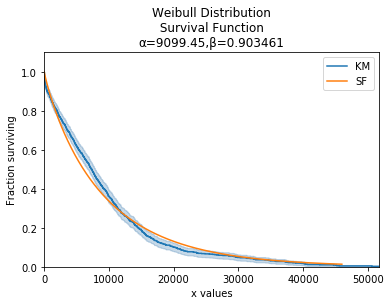

In [15]:
# 有删失数据的拟合生存曲线
from reliability.Distributions import Weibull_Distribution
dist = Weibull_Distribution(alpha=9099.45, beta=0.903461)

KaplanMeier(failures=failures, right_censored=censored, label="KM")

dist.SF(label="SF") #plots the survival function
plt.legend()
plt.show()

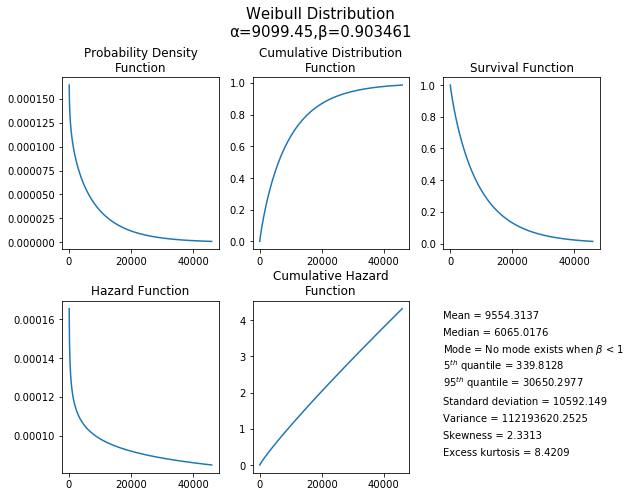

In [16]:
dist.plot()

以上的分析是基于所有的数据得到的分布函数以及对应的参数，以为故障时间不止是第一次的，还有第一次坏掉之后维修完的第二次，第二次坏掉之后维修完的第三次...，所以这里的所有故障时间是没有规律的，不符合实际情况，所以没有实际意义，下面我们需要做的是筛选出第一次出现故障的数据，和第一次使用到目前为止还没出现故障的数据，进行分析和计算。

这里研究的不是可维修件。

In [18]:
path = os.path.dirname(os.getcwd())+'\\data_csv\\541674-4.csv'
data1 = pd.read_csv(path, encoding = "GBK")
data1["部件本次装机使用小时"] = data1["部件本次装机使用小时"].str.split(':').str[0].astype(int)
data1 = data1[data1["部件本次装机使用小时"]>0]
data1["IsPlanned"] = data1["非计划"]=="X"
data_y = data1[["IsPlanned", "部件本次装机使用小时"]]

data1["IsPlaneNew"] = data1["部件装上飞行小时数"]=="00:00"
data1["IsPartNew"] = data1["部件装上使用小时数"]=="00:00"
data1.shape

(883, 38)

In [22]:
da = data1[["部件本次装机使用小时","IsPartNew","IsPlanned"]]
da

,部件本次装机使用小时,IsPartNew,IsPlanned
0,45588,True,True
1,901,False,True
2,45119,True,True
3,44695,True,True
4,151,False,True
6,981,False,True
7,1591,False,False
8,40114,True,True
9,20609,True,True
10,37429,True,True


In [32]:
# 第一次使用的零件（新零件）
first = da.loc[da["IsPartNew"] == True, ]
first.shape

(257, 3)

In [47]:
# 第一次出现故障的零件
ffail = first.loc[first["IsPlanned"] == True,]
ffail = np.array(ffail["部件本次装机使用小时"])
ffail.shape

(230,)

In [41]:
# 第一次使用的新零件，还未出故障
censored = first.loc[first["IsPlanned"] == False,]
censored = np.array(censored["部件本次装机使用小时"])
censored.shape

(27,)

                  Alpha     Beta   Gamma       Mu    Sigma       Lambda     AICc      BIC
Distribution                                                                             
Weibull_2P      17053.5  1.46652                                         4852.91  4859.73
Gamma_2P        8130.59  1.89885                                         4854.02  4860.84
Weibull_3P      16790.4  1.40659  61.991                                 4860.95  4867.78
Gamma_3P        9323.32  1.64928  61.991                                 4868.75  4875.58
Exponential_2P                        62                    6.50332e-05   4896.7  4900.12
Exponential_1P                                              6.47721e-05  4898.55  4901.97
Lognormal_2P                              9.35878  0.91643               4921.66  4928.48
Normal_2P                                 15438.7  10861.2               4931.52  4938.35


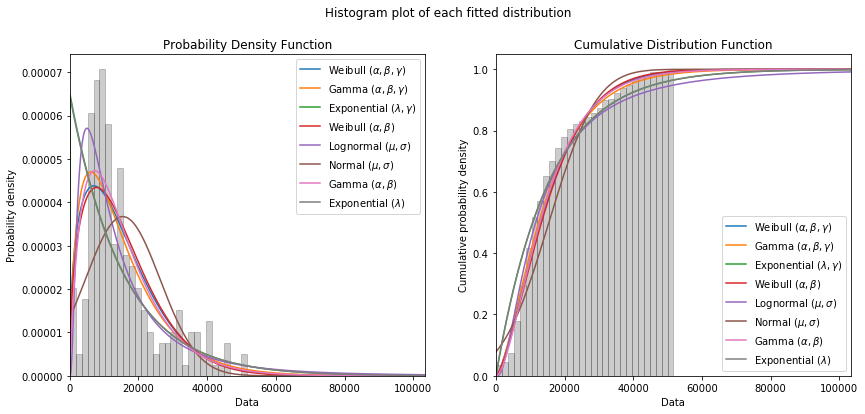

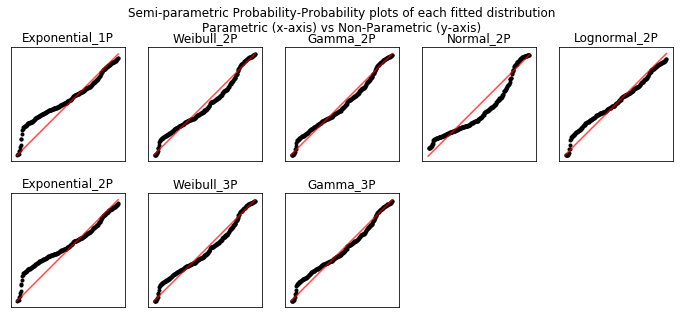

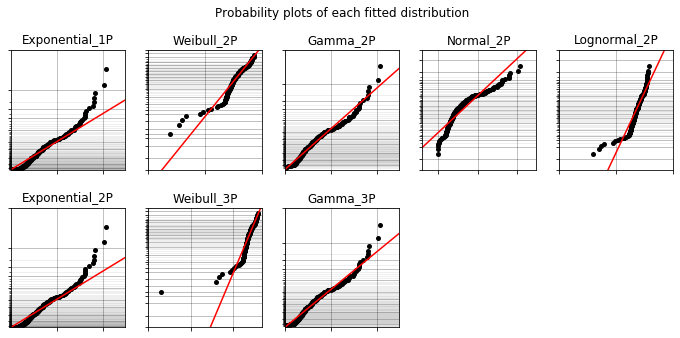

In [39]:
from reliability.Fitters import Fit_Everything
results=Fit_Everything(failures=ffail)

                  Alpha     Beta   Gamma       Mu     Sigma       Lambda     AICc      BIC
Distribution                                                                              
Weibull_2P      17972.1  1.47769                                          4887.05   4894.1
Gamma_2P        8517.27  1.91207                                          4887.68  4894.73
Weibull_3P      17739.8  1.41833  61.991                                  4895.32  4902.37
Gamma_3P        9553.97  1.69516  61.991                                   4902.8  4909.85
Exponential_2P                        62                     6.00128e-05  4933.64  4937.18
Exponential_1P                                               5.97644e-05  4935.55  4939.09
Lognormal_2P                               9.4256  0.923249               4953.94  4960.99
Normal_2P                                 16231.4   11078.9               4968.26  4975.32


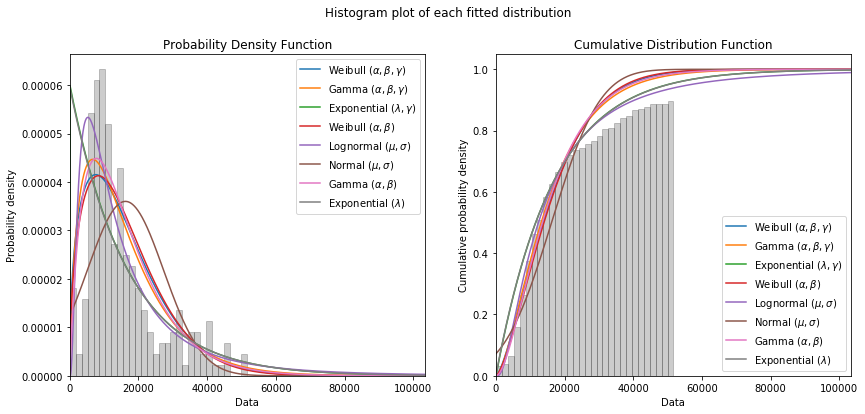

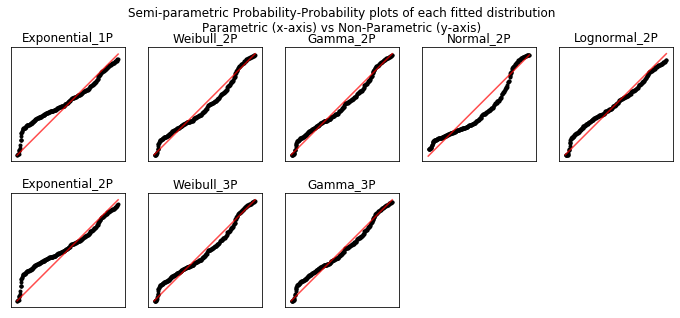

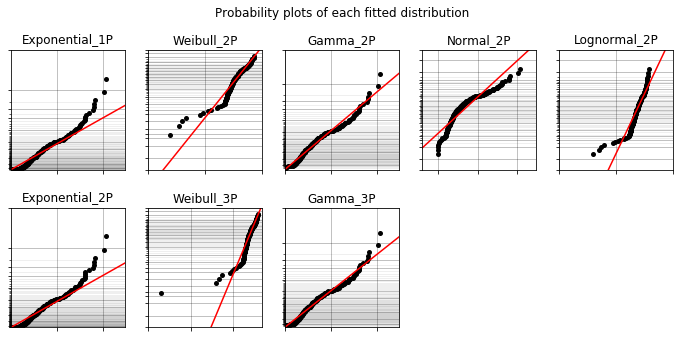

In [43]:
from reliability.Fitters import Fit_Everything
results=Fit_Everything(failures=ffail,right_censored=censored)

Results from Fit_Weibull_2P (95% CI):
           Point Estimate  Standard Error      Lower CI      Upper CI
Parameter                                                            
Alpha        17053.514002      807.637294  15541.818468  18712.246601
Beta             1.466519        0.073560      1.329205      1.618018


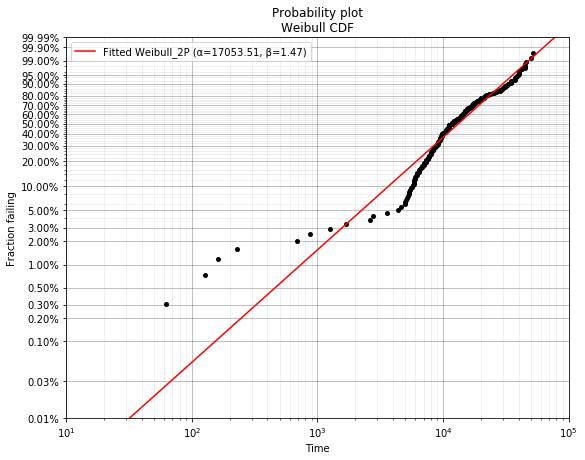

In [48]:
from reliability.Fitters import Fit_Weibull_2P
from reliability.Distributions import Weibull_Distribution
output = Fit_Weibull_2P(ffail)

Results from Fit_Weibull_2P (95% CI):
           Point Estimate  Standard Error      Lower CI      Upper CI
Parameter                                                            
Alpha        17972.081616      829.698749  16417.303591  19674.102742
Beta             1.477694        0.073216      1.340942      1.628393


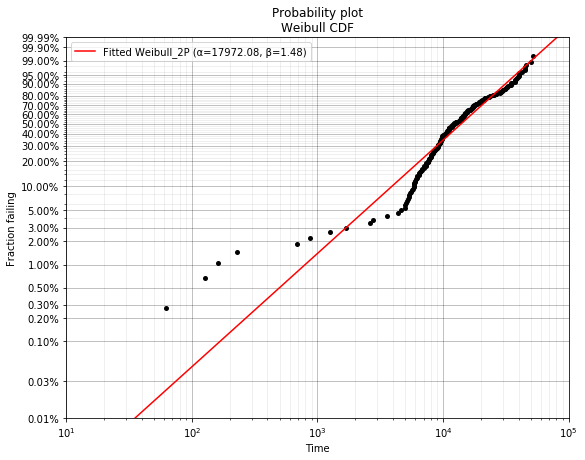

In [49]:
from reliability.Fitters import Fit_Weibull_2P
from reliability.Distributions import Weibull_Distribution
output = Fit_Weibull_2P(ffail,censored)

In [ ]:
#############################################################################

In [51]:
# MTBF 平均故障时间间隔（不含删失数据）
print(len(ffail))
MTBF = sum(ffail)/len(ffail)
MTBF

230


15438.747826086956

In [57]:
# Γ(s)函数  即是伽马（gamma）函数
import sympy
from sympy import E, oo 

def gamma_(s):
#     s = sympy.symbols("s")
    x = sympy.symbols("x")
    return sympy.integrate(x**(s-1)*E**(-x),(x,0,oo))

In [58]:
gamma_(5)

24

Results from Fit_Weibull_3P (95% CI):
           Point Estimate Standard Error Lower CI Upper CI
Parameter                                                 
Alpha        16790.431684        823.069  15252.3  18483.7
Beta             1.406591      0.0714635  1.27327  1.55387
Gamma           61.991000                                 


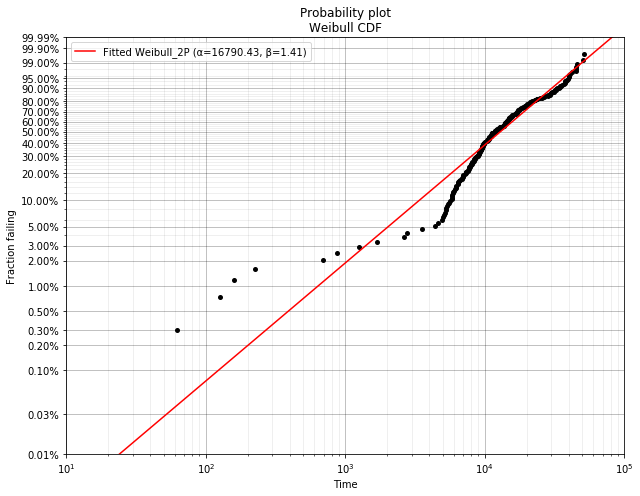

In [59]:
from reliability.Fitters import Fit_Weibull_3P
results=Fit_Weibull_3P(ffail)

In [ ]:
##################################################################

以下是python两个不同库呈现出的分布图信息

Results from Fit_Weibull_2P (95% CI):
           Point Estimate  Standard Error      Lower CI      Upper CI
Parameter                                                            
Alpha        17053.514002      807.637294  15541.818468  18712.246601
Beta             1.466519        0.073560      1.329205      1.618018


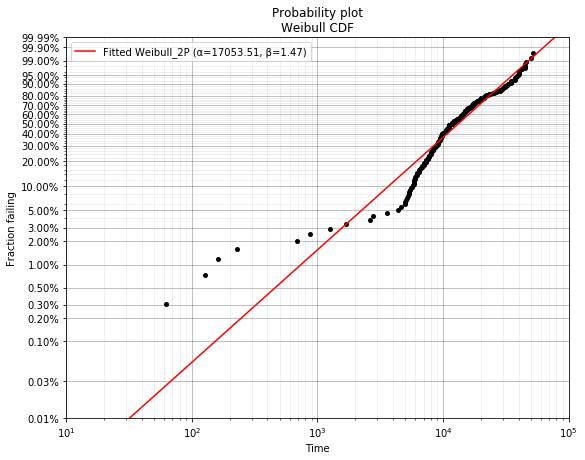

In [54]:
from reliability.Fitters import Fit_Weibull_2P
results=Fit_Weibull_2P(ffail)

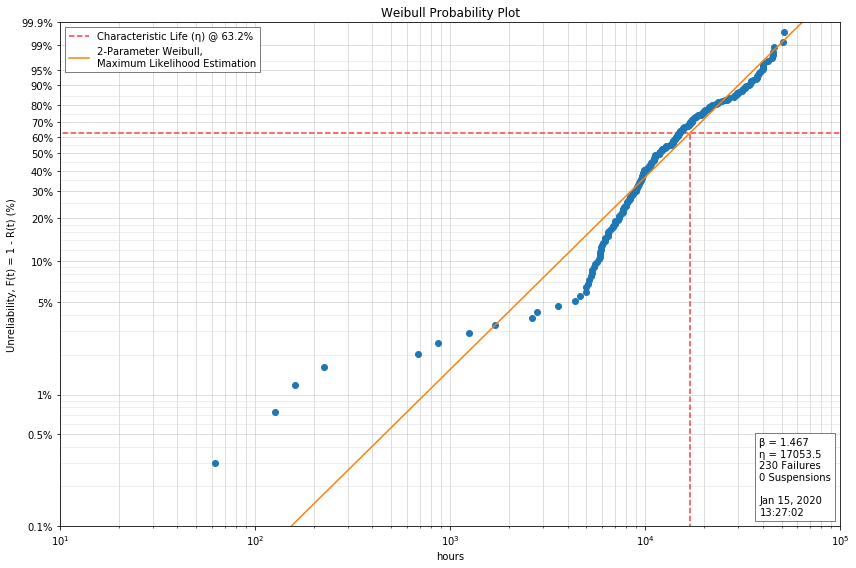

In [56]:
import weibull
import warnings
warnings.filterwarnings("ignore", category=Warning)

analysis = weibull.Analysis(ffail, unit='hour')
analysis.fit(method='mle')
analysis.probplot()

### Weibull_2P
#### 含右删失
- eta=17972.081616, beta=1.477694

#### 不含右删失
- eta=17053.514002, beta=1.466519

               Censoring code (censored=0)  Items remaining  Kaplan-Meier Estimate  Lower CI bound  Upper CI bound
Failure times                                                                                                     
62                                       1              257               0.996109        0.988497        1.000000
88                                       0              256               0.996109        0.988497        1.000000
127                                      1              255               0.992203        0.981438        1.000000
160                                      1              254               0.988296        0.975130        1.000000
227                                      1              253               0.984390        0.969212        0.999568
688                                      1              252               0.980484        0.963545        0.997423
865                                      1              251               0.9765

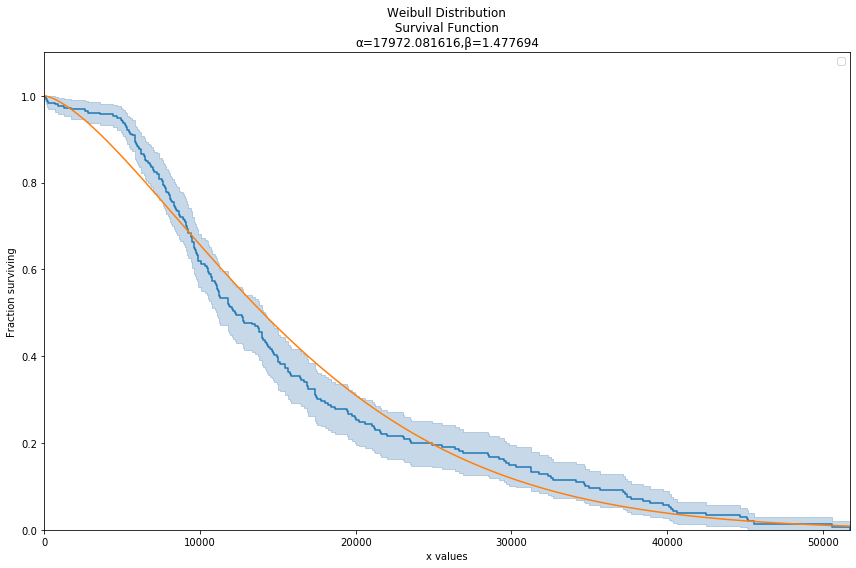

In [62]:
from reliability.Distributions import Weibull_Distribution
dist = Weibull_Distribution(alpha=17972.081616, beta=1.477694)

KaplanMeier(failures=ffail, right_censored=censored)

dist.SF() #plots the survival function
plt.legend()
plt.show()

               Censoring code (censored=0)  Items remaining  Kaplan-Meier Estimate  Lower CI bound  Upper CI bound
Failure times                                                                                                     
62.0                                   1.0              230               0.995652        0.987149        1.000000
127.0                                  1.0              229               0.991304        0.979306        1.000000
160.0                                  1.0              228               0.986957        0.972293        1.000000
227.0                                  1.0              227               0.982609        0.965714        0.999503
688.0                                  1.0              226               0.978261        0.959414        0.997107
865.0                                  1.0              225               0.973913        0.953314        0.994513
1254.0                                 1.0              224               0.9695

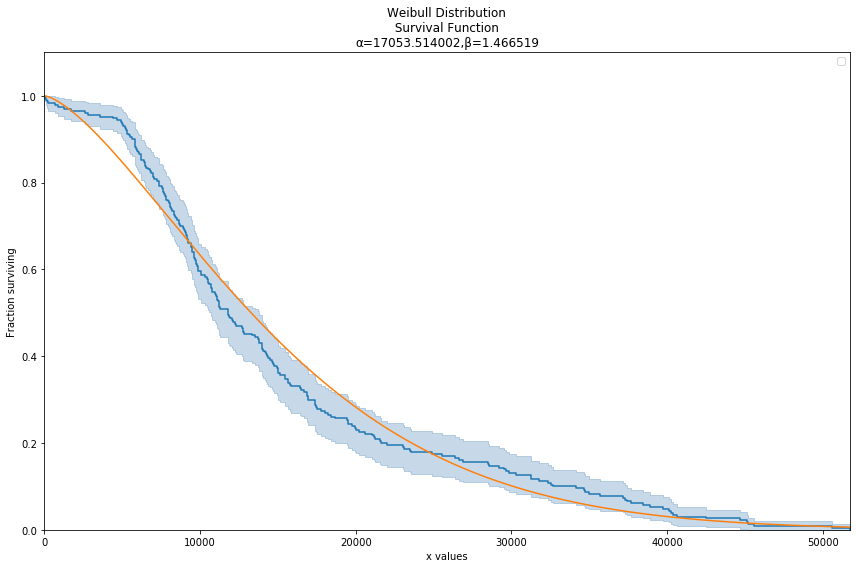

In [63]:
from reliability.Distributions import Weibull_Distribution
dist = Weibull_Distribution(alpha=17053.514002, beta=1.466519)

KaplanMeier(failures=ffail)

dist.SF() #plots the survival function
plt.legend()
plt.show()

In [7]:
# η -- 尺寸参数 ；   β --形状参数
# 这里对应求得的是
# --Alpha;    --Beta
η = 8427.887569
β = 0.895811

In [27]:
from sympy import E
def pdf(t):   
#     t = sympy.symbols("t") 
    a = (β/η)*(t/η)**(β-1)
    b = -(t/η)**β
    c = E**b
    return a*c

In [28]:
pdf(50)

0.000179516584672709

In [23]:
import sympy
from sympy import E
def pdf(t, η, β):       
#     t = sympy.symbols("t")  
#     η = sympy.symbols("η") 
#     β = sympy.symbols("β") 
    a = (β/η)*(t/η)**(β-1)*E**(-(t/η)**β)
    return a

In [24]:
pdf(50,100,2)

0.00778800783071405

In [98]:
# 失效率是指工作到某一时刻尚未失效的产品，在该时刻后，单位时间内发生失效的概率。一般记
# 为λ，它也是时间t的函数，故也记为λ(t)，称为失效率函数，有时也称为故障率函数或风险函数。
# 平均失效率
def λ_mean(T):
    a = (1/η)*(T/η)**(β-1)
    return a

In [99]:
# 目标 ---> 求CT 最小值 ，从而确定最优维修时间间隔 T 。
def CT(T,Cf,Cp,λ_mean):
    a =Cf * λ_mean + Cp / T
    return a

In [100]:
λ_mean(95017)

9.218618329959535e-05

In [101]:
CT(95017,5,1,9.218618329959535e-05)

0.00047145534896795584

Cost model assuming as good as new replacement (q=0):
The minimum cost per unit time is 0.00031 
The optimal replacement time is 12590.92


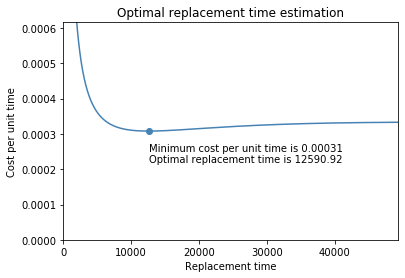

In [157]:
from reliability.Repairable_systems import optimal_replacement_time
import matplotlib.pyplot as plt
optimal_replacement_time(cost_PM=1, cost_CM=5, weibull_alpha=16456.1, weibull_beta=1.4169,q=0)
plt.show()

In [158]:
def T_min(η, β, Cp, Cf):
    a = η * (Cp / ((β - 1) * Cf)) ** (1 / β)
    return a

In [159]:
TT = T_min(16456.1, 1.4169, 1, 5)
TT

9799.099971740769

In [160]:
TT*1.1

10779.009968914846

In [145]:
TT*0.9

8819.189974566692

In [52]:
# 故障分布函数
def F(t, η, β):
    a = 1 - E ** ( - ( t / η )) ** β
    return a 

In [162]:
(sum(ffail)/len(ffail))

14974.171206225681

In [112]:
def cupt(t, η, β, cp, cf):
    a = cp * (E ** ( - ( t / η )) ** β) + (cf * (1 - E ** ( - ( t / η )) ** β))
    b = a/st
    return b

In [152]:
cupt(12590.92,16456.1,1.4169,1,5)

7.9422313857923e-5*(5 - 3.35235967271155*exp(-0.66112985235104*I))*exp(-0.000304297213713418*(-t)**0.895811)

In [111]:
from sympy import *

x = symbols("x")
# t = symbols("t")
a = E ** ( - ( t / η )) ** β

st = sympy.integrate(a,(x,0,12590.92))
st

12590.92*exp(0.000304297213713418*(-t)**0.895811)

In [139]:
from sympy import *
def v(m):
    x= symbols("x")

    a = 2*x

    return sympy.integrate(a,(x,0,m))

In [140]:
v(4)

16

In [276]:
import math
η=16456.1
β=1.4169
λ=1/(sum(ffail)/len(ffail))
def Tcap(θ):
    aa = (1-θ/λ)**(-1)
    a = log(aa)
    b = η * a**(1/β)
    return b


In [277]:
λ=1/(sum(ffail)/len(ffail))
if λ - 0.1>0:
    print(1)
else:
    print(2)

2


In [278]:
Tcap(0.99)

16456.1*(-9.60396428194153 + I*pi)**0.70576610911144

In [271]:
import math
η=16456.1
β=1.4169
λ=len(ffail)/sum(ffail)
def Tcap(θ):

    b = η * (np.log((1-θ/λ)**(-1)))**(1/β)
    return b

In [234]:
log(E)**(-1)

1

In [12]:
import numpy as np
import math
η=16456.1
β=1.4169

# 安全门槛值
def Tcap(λ):
    b = η * (np.log((1-λ)**(-1)))**(1/β)
    return b

In [13]:
Tcap(0.45)

11445.812392170075

In [235]:
log((E)**(-1))

-1

In [237]:
-1 *log(E)

-1

In [171]:
from reliability.Fitters import Fit_Weibull_2P
output=Fit_Weibull_2P(ffail,show_probability_plot=False, print_results=False)
# output.results

In [175]:
Para = output.results
Para

,Point Estimate,Standard Error,Lower CI,Upper CI
Parameter,,,,
Alpha,16456.057125,762.760038,15026.971669,18021.050553
Beta,1.416898,0.067290,1.290964,1.555117


In [180]:
Para.iloc[0:1,0:1]

,Point Estimate
Parameter,
Alpha,16456.057125


In [183]:
η = Para.iloc[0,0]
η

16456.0571251071

In [184]:
β = Para.iloc[1,0]
β 

1.4168979677060156

In [5]:
# Cp和Cf的求法
# Cp
# Cg -- 地面保障设备分摊费用
# Cmc -- 材料及耗材费用
# Hm -- 人力工时
# Np -- 工作人员数量
# R1 -- 工时率

Cp =Cg + Cmc + Hm * Np * R1
Cp = 78
if Cp < 75 :
    Cp = 75
else:
    Cp = Cp

# Cf 
# Cr -- 部件修理费 
# Cdel -- 航班延迟费
# Ccan -- 航班取消费
# Cmc -- 材料及耗材费用
# Cadj -- 时间间隔调整值
# Cout -- 停飞费用
# Cdiv -- 转飞费用
# Hm -- 人力工时
# Np -- 工作人员数量
# R1 -- 工时率

Cf = Cr + Cdel + Ccan + Cmc + Cadj + Cout + Cdiv + Hm * Np * R1


78


In [ ]:
# 库存理论及管理方法
# 1.ABC分类法
# 2.VED分类法
# 3.重要性分类

# 库存策略
# 1.(Q，R)策略
# 2.(R，S)策略
# 3.(t，S)策略
# 4.(t，R，S)策略

modified
hazard tolerance
man hours
material
run to failure cost
preventive maintenance cost
ratio diff to the optimization
reliability prediction
realtime reliability prediction
stock out probability
 hazard function


In [64]:
import sympy
from sympy import E

# 故障分布函数 (累积分布函数)
def F(t, eta, beta):
    a = 1 - E ** ( - ( t / eta)) ** beta
    return a

# 概率密度函数
def pdf(t, eta, beta):       
    a = (beta / eta) * (t / eta) ** (beta - 1) * E ** ( - (t / eta) ** beta)
    return a

# 生存函数
def sf(t, eta, beta):
    a = E ** ( - ( t / eta)) ** beta
    return a


In [66]:
η=16456.1
β=1.4169
abs(sf(10000,16456.1,1.4169))

0.880349593843070

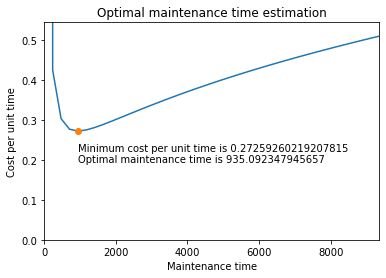

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
C=0.27259260219207815
T=935.092347945657
eta=16456.1
beta=1.4169
tt = np.linspace(1, eta * beta, 100)
cost=[75.01110773788267, 0.42557295855201493, 0.30356797841590666, 0.27727350415258445,
      0.27259667212908895, 0.2755082453458726, 0.2816282312637187, 0.2892183822378656, 0.29748430872886367,
      0.3060288803957435, 0.31464182134699825, 0.32320801979232555, 0.3316637526581488, 0.3399742772072252,
      0.3481217170249872, 0.35609822303194755, 0.36390197642720096, 0.3715347873242607, 0.37900062069421436,
      0.38630467692810144, 0.39345281219668815, 0.400451171201108, 0.4073059548713436, 0.4140232749292127, 
      0.4206090649099831, 0.42706902811110553, 0.4334086097539045, 0.4396329849900624, 0.44574705719640934,
      0.4517554628442305, 0.45766258045058894, 0.463472541936431, 0.4691892452675561, 0.4748163676288445,
      0.4803573786375058, 0.4858155532758396, 0.4911939843436787, 0.4964955943125294, 0.5017231465191491, 
      0.5068792556739182, 0.5119663976844006, 0.5169869188107836, 0.5219430441801102, 0.5268368856922302, 
      0.5316704493535325, 0.5364456420756787, 0.5411642779764035, 0.5458280842184362, 0.5504387064210381,
      0.5549977136767875, 0.5595066032042046, 0.5639668046647298, 0.5683796841704936, 0.5727465480073096,
      0.5770686460954099, 0.5813471752086283, 0.5855832819710516, 0.5897780656485894, 0.5939325807514568, 
      0.5980478394622308, 0.6021248139029111, 0.6061644382532896, 0.6101676107319071, 0.6141351954499265, 
      0.6180680241473987, 0.6219668978206121, 0.6258325882484951, 0.6296658394253981, 0.6334673689069746,
      0.6372378690753476, 0.640978008329245, 0.6446884322043389, 0.6483697644286088, 0.6520226079171727, 
      0.6556475457106804, 0.6592451418610582, 0.6628159422680907, 0.6663604754700754, 0.6698792533915325, 
      0.6733727720507406, 0.676841512229651, 0.6802859401085645, 0.6837065078677651, 0.6871036542581617, 
      0.6904778051428317, 0.6938293740112352, 0.6971587624677419, 0.7004663606959981, 0.7037525479005589, 0.7070176927271133, 0.7102621536625393, 0.7134862794159436, 0.7166904092817686, 0.7198748734859701, 0.7230399935162124, 0.7261860824369615, 0.7293134451903022, 0.7324223788832527, 0.7355131730623028, 0.738586109975856]

fig = plt.figure()
plt.plot(tt, cost)
plt.plot(T, C, 'o')
text_str = str('\nMinimum cost per unit time is ' + str(C) +
               '\nOptimal maintenance time is ' + str(T))
plt.text(T, C, text_str, verticalalignment='top')
plt.xlabel('Maintenance time')
plt.ylabel('Cost per unit time')
plt.title('Optimal maintenance time estimation')
plt.ylim([0, C * 2])
plt.xlim([0, 10*T])
plt.show()


In [36]:
import sympy
from sympy import E, oo
def tcap(eta, beta, theta, lamb_e):
    """时间间隔上限"""
    t = eta * (sympy.log((1 - theta / lamb_e) ** (-1))) ** (1 / beta)
    return t
tcap(17053.514001799067, 1.4665187077699207,1000,10000)

3676.12835593094

In [6]:
def failure_rate(T, eta, beta):
    """某个零件出故障的概率，在 T 时"""
    p = 1 - abs((E ** (- ((T + 1) / eta)) ** beta) / (E ** (- (T / eta)) ** beta))
    return p

p = failure_rate(154, 16456.1, 1.4196)
p = abs(p)
p

3.04032493969597e-6

In [7]:
from scipy.stats import binom
rv = binom(2000, p)
rv

In [8]:
#求对应分布的概率:概率质量函数 (PMF)
binom.pmf(1,2000, 3.04032493969597e-6)

0.006043806082108286

In [12]:
import numpy
def failure_rate(T, eta, beta):

    p = 1 - abs((numpy.exp(1) ** (- ((T + 1) / eta)) ** beta) / (numpy.exp(1) ** (- (T / eta)) ** beta))
    return p

p = failure_rate(154, 16456.1, 1.4196)
print(p)

rv = binom.pmf(1, 20, p)
print(rv)

3.040324939695971e-06
6.080298633125074e-05


In [13]:
p = failure_rate(15400, 16456.1, 1.4196)
print('%.16f' %p)
rv = binom.pmf(2, 20, p)
print('%.16f' %rv)

0.0000209667691268
0.0000000834935106


In [14]:
import numpy
def failure_rate(T, eta, beta):
    """某个零件出故障的概率，在 T 时"""
    # t = 900 表示900小时周期，坏掉k个以上的概率
    p = 1 - abs(numpy.exp(1) ** (- (T + 900) / eta) ** beta) / abs(numpy.exp(1) ** (- (T / eta)) ** beta)
    return p

p = failure_rate(13500, 16456.1, 1.4196)
print(p)
li = []
li_ = []
li_1 = []
N=100
for j in range(10):
    li_1.append(j+1)
    li = []
# #     k = j
    for i in range(j+1, N+1):
        li.append(binom.pmf(i, N, p))
#     print(li)
    sop = sum(li)
    
    li_.append(float('%.16f' %sop))
# print(li)
print(li_)
print(li_1)


0.017939445626970252
[0.8363836334507303, 0.5375031928992161, 0.2672483753892441, 0.1059800723670297, 0.0345417068222045, 0.0094861828645861, 0.0022393775410438, 0.0004617238497821, 8.42291387349e-05, 1.37392313651e-05]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [16]:
li_1.insert(0,0)
li_1
li_.insert(0,1)
li_

[1,
 0.8363836334507303,
 0.5375031928992161,
 0.2672483753892441,
 0.1059800723670297,
 0.0345417068222045,
 0.0094861828645861,
 0.0022393775410438,
 0.0004617238497821,
 8.42291387349e-05,
 1.37392313651e-05]

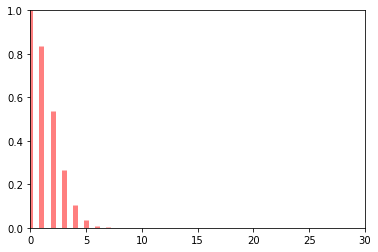

In [17]:
from scipy.stats import binom
fig, ax = plt.subplots(1,1)

x=li_1
for i in range(len(li_1)-1):
    ax.plot()#li_1[i], li_[i], 'bo', ms=8, label='binom pmf'
    ax.vlines(li_1[i], 0,li_[i], colors='r', lw=5, alpha=0.5)
# ax.legend(loc='best', frameon=False)
plt.ylim([0, 1])
plt.xlim([0, 30])
plt.show()

In [18]:
# def stock_out_mean_time(k, N, eta, beta):
#     t = eta * (-sympy.log(1 - k / N )) ** (1 / beta)
#     return t
def stock_out_mean_time(k, N, eta, beta):
    
    t = eta * (-sympy.log(1 - k / N )) ** (1 / beta)
    return t
li_2 = []

for i in range(1,11):
    print(i)
    t=stock_out_mean_time(i, 80, 16456.1, 1.4196)
    a = round(t / 7.8)
    li_2.append(a)
li_2

1
2
3
4
5
6
7
8
9
10


[97, 158, 212, 260, 306, 350, 392, 432, 472, 511]

In [5]:
a=1
aa=[]
aa.append(a)
type(aa)

list